# Traffic Light Classifier
---

In this project, I’ll use your knowledge of computer vision techniques to build a classifier for images of traffic lights! Given a dataset of traffic light images in which one of three lights is illuminated: red, yellow, or green. The tasks will be broken down into a few sections:

1. **Loading and visualizing the data**. 

2. **Pre-processing**. 
       
3. **Feature extraction**. 
    Extract some features from each image that will help distinguish and eventually classify these images.
   
4. **Classification and visualizing error**. 
    Features to classify *any* traffic light image.  
    
5. **Evaluate your model**.
    
Here are some sample images from the dataset (from left to right: red, green, and yellow traffic lights):
<img src="images/all_lights.png" width="50%" height="50%">


# 1. Loading and Visualizing the Traffic Light Dataset

This traffic light dataset consists of 1484 number of color images in 3 categories - red, yellow, and green. As with most human-sourced data, the data is not evenly distributed among the types. There are:
* 904 red traffic light images
* 536 green traffic light images
* 44 yellow traffic light images

*Note: All images come from this [MIT self-driving car course](https://selfdrivingcars.mit.edu/) and are licensed under a [Creative Commons Attribution-ShareAlike 4.0 International License](https://creativecommons.org/licenses/by-sa/4.0/).*

## a. Import resources

Before you get started on the project code, import the libraries and resources that needed.

In [5]:
import cv2 # computer vision library
import random # for testingg 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg # for loading in images

import os
import glob # library for loading images from a directory

%matplotlib inline

## b. Training and Testing Data

All 1484 of the traffic light images are separated into training and testing datasets. 

* 80% of these images are training images to create a classifier.
* 20% are test images, which will be used to test the accuracy of the classifier.
* All images are pictures of 3-light traffic lights with one light illuminated.

## c. Define the image directories

First, we set some variables to keep track of some where our images are stored:

    IMAGE_DIR_TRAINING: the directory where our training image data is stored
    IMAGE_DIR_TEST: the directory where our test image data is stored

In [2]:
# Image data directories
IMAGE_DIR_TRAINING = "traffic_light_images/training/"
IMAGE_DIR_TEST = "traffic_light_images/test/"

## d. Load the datasets

These first few lines of code will load the training traffic light images and store all of them in a variable, `IMAGE_LIST`. This list contains the images and their associated label ("red", "yellow", "green"). 

This will give you a good idea about how lots of image files can be read in from a directory using the [glob library](https://pymotw.com/2/glob/). The `load_dataset` function takes in the name of an image directory and returns a list of images and their associated labels. 

For example, the first image-label pair in `IMAGE_LIST` can be accessed by index: 
``` IMAGE_LIST[0][:]```.


In [6]:
# Load the image in
# This function loads in images and their labels and places them in a list
# The list contains all images and their associated labels
# For example, after data is loaded, im_list[0][:] will be the first image-label pair in the list
def load_dataset(image_dir):
    
    # Populate this empty image list
    im_list = []
    image_types = ["red", "yellow", "green"]
    
    # Iterate through each color folder
    for im_type in image_types:
        
        # Iterate through each image file in each image_type folder
        # glob reads in any image with the extension "image_dir/im_type/*"
        for file in glob.glob(os.path.join(image_dir, im_type, "*")):
            
            # Read in the image
            im = mpimg.imread(file)
            
            # Check if the image exists/if it's been correctly read-in
            if not im is None:
                # Append the image, and it's type (red, green, yellow) to the image list
                im_list.append((im, im_type))

    return im_list

In [7]:
# Using the load_dataset function in helpers.py
# Load training data
IMAGE_LIST = load_dataset(IMAGE_DIR_TRAINING)

## e. Visualize the Data

The first steps in analyzing any dataset are to 1. load the data and 2. look at the data. Seeing what it looks like will give an idea of what to look for in the images, what kind of noise or inconsistencies developer have to deal with, and so on. This will help us understand the image dataset, and **understanding a dataset is part of making predictions about the data**.
Visualize and explore the image data! Write code to display an image in `IMAGE_LIST`:
* Display the image
* Print out the shape of the image 
* Print out its corresponding label

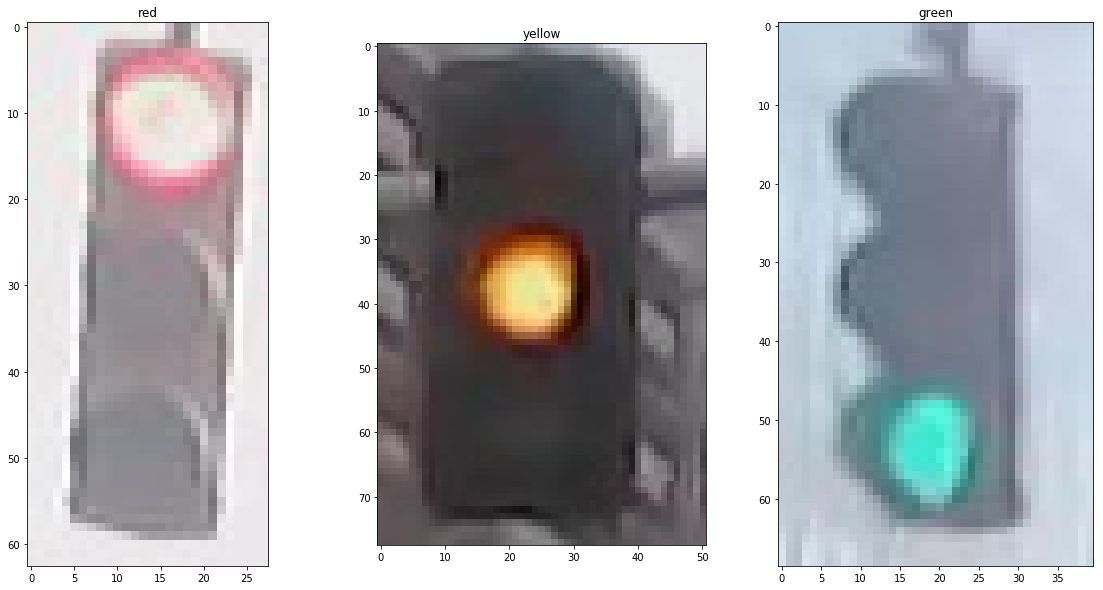

In [8]:
# Quick view of the image
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))
ax1.set_title(IMAGE_LIST[0][1])
ax1.imshow(IMAGE_LIST[0][0])

ax2.set_title(IMAGE_LIST[750][1])
ax2.imshow(IMAGE_LIST[750][0])

ax3.set_title(IMAGE_LIST[900][1])
ax3.imshow(IMAGE_LIST[900][0])

---
# 2. Pre-process the Data

After loading in each image, you have to standardize the input and output!

### Input

This means that every input image should be in the same format, of the same size, and so on. We'll be creating features by performing the same analysis on every picture, and for a classification task like this, it's important that **similar images create similar features**! 

### Output

We also need the output to be a label that is easy to read and easy to compare with other labels. It is good practice to convert categorical data like "red" and "green" to numerical data.

A very common classification output is a 1D list that is the length of the number of classes - three in the case of red, yellow, and green lights - with the values 0 or 1 indicating which class a certain image is. For example, since we have three classes (red, yellow, and green), we can make a list with the order: [red value, yellow value, green value]. In general, order does not matter, we choose the order [red value, yellow value, green value] in this case to reflect the position of each light in descending vertical order.

A red light should have the  label: [1, 0, 0]. Yellow should be: [0, 1, 0]. Green should be: [0, 0, 1]. These labels are called **one-hot encoded labels**.

*(Note: one-hot encoding will be especially important when you work with [machine learning algorithms](https://machinelearningmastery.com/how-to-one-hot-encode-sequence-data-in-python/)).*

<img src="images/processing_steps.png" width="80%" height="80%">


---
<a id='task2'></a>
## a. (IMPLEMENTATION): Standardize the input images

* Resize each image to the desired input size: 32x32px.
* (Optional) You may choose to crop, shift, or rotate the images in this step as well.

It's very common to have square input sizes that can be rotated (and remain the same size), and analyzed in smaller, square patches. It's also important to make all your images the same size so that they can be sent through the same pipeline of classification steps!

In [9]:
# This function should take in an RGB image and return a new, standardized version
def standardize_input(image):
    image_crop = np.copy(image)
    row_crop = 7
    col_crop = 8
    
    # Crop to cut out the white surround part
    image_crop = image[row_crop:-row_crop, col_crop:-col_crop, :]
    
    # Resize the images
    standard_im = cv2.resize(image_crop, (32, 32))
    return standard_im
    

## b. Standardize the output

With each loaded image, we also specify the expected output. For this, we use **one-hot encoding**.

* One-hot encode the labels. To do this, create an array of zeros representing each class of traffic light (red, yellow, green), and set the index of the expected class number to 1. 

Since we have three classes (red, yellow, and green), we have imposed an order of: [red value, yellow value, green value]. To one-hot encode, say, a yellow light, we would first initialize an array to [0, 0, 0] and change the middle value (the yellow value) to 1: [0, 1, 0].


---
<a id='task3'></a>
### (IMPLEMENTATION): Implement one-hot encoding

In [10]:
## TODO: One hot encode an image label
## Given a label - "red", "green", or "yellow" - return a one-hot encoded label

# Examples: 
# one_hot_encode("red") should return: [1, 0, 0]
# one_hot_encode("yellow") should return: [0, 1, 0]
# one_hot_encode("green") should return: [0, 0, 1]

def one_hot_encode(label):
    
    ## TODO: Create a one-hot encoded label that works for all classes of traffic lights
    one_hot_encoded = [1, 0, 0] # red has the most picture
    
    if(label == 'green'):
        one_hot_encoded = [0, 0, 1]
    elif (label == 'yellow'):
        one_hot_encoded = [0, 1, 0] 
    
    return one_hot_encoded


## c. Construct a `STANDARDIZED_LIST` of input images and output labels.

This function takes in a list of image-label pairs and outputs a **standardized** list of resized images and one-hot encoded labels.

This uses the functions you defined above to standardize the input and output, so those functions must be complete for this standardization to work!


In [12]:
def standardize(image_list):
    
    # Empty image data array
    standard_list = []

    # Iterate through all the image-label pairs
    for item in image_list:
        image = item[0]
        label = item[1]

        # Standardize the image
        standardized_im = standardize_input(image)

        # One-hot encode the label
        one_hot_label = one_hot_encode(label)    

        # Append the image, and it's one hot encoded label to the full, processed list of image data 
        standard_list.append((standardized_im, one_hot_label))
        
    return standard_list

# Standardize all training images
STANDARDIZED_LIST = standardize(IMAGE_LIST)

## d. Visualize the standardized data

Display a standardized image from STANDARDIZED_LIST and compare it with a non-standardized image from IMAGE_LIST. Note that their sizes and appearance are different!

Shape: (32, 32, 3)
Label: [1, 0, 0]


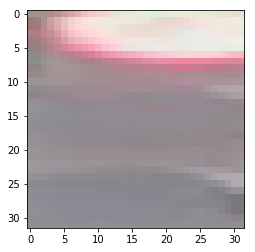

In [13]:
## TODO: Display a standardized image and its label
image_num = 0

# Display the image:
plt.imshow(STANDARDIZED_LIST[image_num][0])
print("Shape: "+str(STANDARDIZED_LIST[image_num][0].shape))
print("Label: " + str(STANDARDIZED_LIST[image_num][1]))

# 3. Feature Extraction

Usingcolor spaces, shape analysis, and feature construction to create features that help distinguish and classify the three types of traffic light images.
One thing to note is that must **never classify a red light as a green light** because this creates a serious safety risk for a self-driving car.
These features will be combined near the end of his notebook to form a complete classification algorithm.

## a. Creating a brightness feature 

There are a number of ways to create a brightness feature that will help us characterize images of traffic lights, and it will be up to the developer to decide on the best procedure to complete this step. Pictured below is a sample pipeline for creating a brightness feature (from left to right: standardized image, HSV color-masked image, cropped image, brightness feature):

<img src="images/feature_ext_steps.png" width="70%" height="70%">


## b. RGB to HSV conversion

Below, a test image is converted from RGB to HSV colorspace and each component is displayed in an image.

Label [red, yellow, green]: [1, 0, 0]


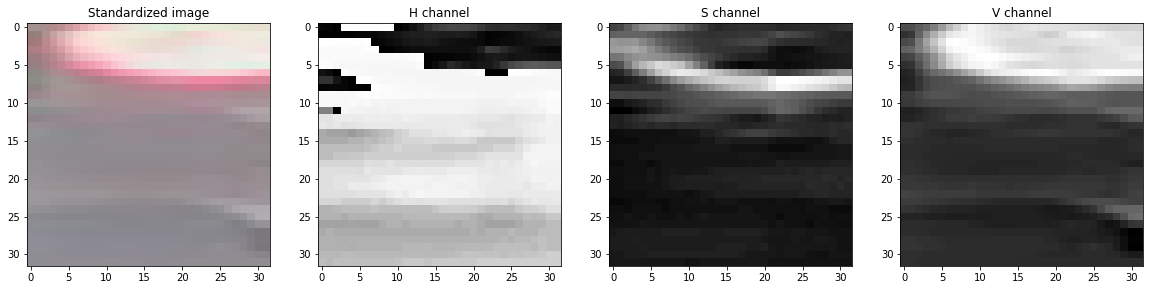

In [14]:
# Convert and image to HSV colorspace
# Visualize the individual color channels

image_num = 0
test_im = STANDARDIZED_LIST[image_num][0]
test_label = STANDARDIZED_LIST[image_num][1]

# Convert to HSV
hsv = cv2.cvtColor(test_im, cv2.COLOR_RGB2HSV)

# Print image label
print('Label [red, yellow, green]: ' + str(test_label))

# HSV channels
h = hsv[:,:,0]
s = hsv[:,:,1]
v = hsv[:,:,2]

# Plot the original image and the three channels
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20,10))
ax1.set_title('Standardized image')
ax1.imshow(test_im)
ax2.set_title('H channel')
ax2.imshow(h, cmap='gray')
ax3.set_title('S channel')
ax3.imshow(s, cmap='gray')
ax4.set_title('V channel')
ax4.imshow(v, cmap='gray')


---
<a id='task7'></a>
## c. (IMPLEMENTATION): Create a brightness feature that uses HSV color space

Write a function that takes in an RGB image and returns a 1D feature vector and/or single value that will help classify an image of a traffic light. The only requirement is that this function should apply an HSV colorspace transformation, the rest is up to you. 

From this feature, you should be able to estimate an image's label and classify it as either a red, green, or yellow traffic light. You may also define helper functions if they simplify your code.

In [15]:
def create_feature_red(rgb_image):
    image_crop_red = rgb_image[:13, 10:-10, :]
    image_crop_red_10x10 = cv2.resize(image_crop_red, (10, 10))
    
    ## Convert image to HSV color space
    hsv_crop_red = cv2.cvtColor(image_crop_red_10x10, cv2.COLOR_RGB2HSV)
    
    ## Create and return a feature value
    feature = np.sum(hsv_crop_red[:,:,2])
    return feature

def create_feature_yellow(rgb_image):
    image_crop_yellow = rgb_image[12:21, 10:-10, :]
    image_crop_yellow_10x10 = cv2.resize(image_crop_yellow, (10, 10))
    
    ## Convert image to HSV color space
    hsv_crop_yellow = cv2.cvtColor(image_crop_yellow_10x10, cv2.COLOR_RGB2HSV)
    
    ## Create and return a feature value
    feature = np.sum(hsv_crop_yellow[:,:,2])
    return feature

def create_feature_green(rgb_image):
    image_crop_green = rgb_image[21:, 10:-10, :]
    image_crop_green_10x10 = cv2.resize(image_crop_green, (10, 10))
    
    ## Convert image to HSV color space
    hsv_crop_green = cv2.cvtColor(image_crop_green_10x10, cv2.COLOR_RGB2HSV)
    
    ## Create and return a feature value
    feature = np.sum(hsv_crop_green[:,:,2])
    return feature

# 4. Classification and Visualizing Error

Using all of your features, write a function that takes in an RGB image and, using the extracted features, outputs whether a light is red, green or yellow as a one-hot encoded label. This classification function should be able to classify any image of a traffic light!

---
<a id='task8'></a>
## a. (IMPLEMENTATION): Build a complete classifier 

In [16]:
def estimate_label(rgb_image):
    
    predicted_label = [1,0,0] # Red
    
    threshold1 = create_feature_red(rgb_image)
    threshold2 = create_feature_yellow(rgb_image)
    threshold3 = create_feature_green(rgb_image)
    
    if threshold3 > threshold1 and threshold3 > threshold2:
        predicted_label = [0,0,1]  # Green
    elif threshold2 > threshold1 and threshold2 > threshold3:
        predicted_label = [0,1,0]  # Yellow  
    
    return predicted_label
    

## b. Testing the classifier

A "good" classifier in this case should meet the following criteria:
- Get above 90% classification accuracy.
- Never classify a red light as a green light. 
- Below, we load in the test dataset, standardize it using the `standardize` function you defined above, and then **shuffle** it; this ensures that order will not play a role in testing accuracy.


In [17]:
# Using the load_dataset function in helpers.py
# Load test data
TEST_IMAGE_LIST = helpers.load_dataset(IMAGE_DIR_TEST)

# Standardize the test data
STANDARDIZED_TEST_LIST = standardize(TEST_IMAGE_LIST)

# Shuffle the standardized test data
random.shuffle(STANDARDIZED_TEST_LIST)

## c. Determine the Accuracy

Compare the output of the classification algorithm with the true labels and determine the accuracy.

In [19]:
# Constructs a list of misclassified images given a list of test images and their labels
# This will throw an AssertionError if labels are not standardized (one-hot encoded)

def get_misclassified_images(test_images):
    # Track misclassified images by placing them into a list
    misclassified_images_labels = []

    # Iterate through all the test images
    # Classify each image and compare to the true label
    for image in test_images:

        # Get true data
        im = image[0]
        true_label = image[1]
        assert(len(true_label) == 3), "The true_label is not the expected length (3)."

        # Get predicted label from your classifier
        predicted_label = estimate_label(im)
        assert(len(predicted_label) == 3), "The predicted_label is not the expected length (3)."

        # Compare true and predicted labels 
        if(predicted_label != true_label):
            # If these labels are not equal, the image has been misclassified
            misclassified_images_labels.append((im, predicted_label, true_label))
            
    # Return the list of misclassified [image, predicted_label, true_label] values
    return misclassified_images_labels


# Find all misclassified images in a given test set
MISCLASSIFIED = get_misclassified_images(STANDARDIZED_TEST_LIST)

# Accuracy calculations
total = len(STANDARDIZED_TEST_LIST)
num_correct = total - len(MISCLASSIFIED)
accuracy = num_correct/total

print('Accuracy: ' + str(accuracy))
print("Number of misclassified images = " + str(len(MISCLASSIFIED)) +' out of '+ str(total))


Accuracy: 0.9831649831649831
Number of misclassified images = 5 out of 297


<a id='task9'></a>
## d. Visualize the misclassified images

Visualize some of the images you classified wrong (in the `MISCLASSIFIED` list) and note any qualities that make them difficult to classify. This will help you identify any weaknesses in your classification algorithm.

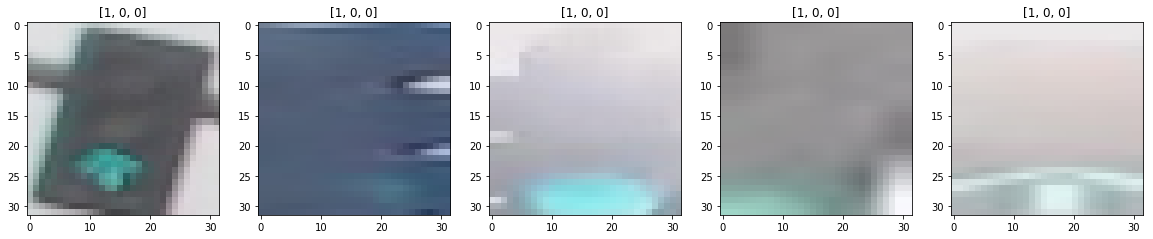

In [20]:
f, (ax1,ax2,ax3,ax4,ax5) = plt.subplots(1, 5, figsize=(20,10))
ax1.set_title(MISCLASSIFIED[0][1])
ax1.imshow(MISCLASSIFIED[0][0])
ax2.set_title(MISCLASSIFIED[1][1])
ax2.imshow(MISCLASSIFIED[1][0])
ax3.set_title(MISCLASSIFIED[2][1])
ax3.imshow(MISCLASSIFIED[2][0])
ax4.set_title(MISCLASSIFIED[3][1])
ax4.imshow(MISCLASSIFIED[3][0])
ax5.set_title(MISCLASSIFIED[4][1])
ax5.imshow(MISCLASSIFIED[4][0])

## Test if you classify any red lights as green

The code below lets you test to see if we've misclassified any red lights as green in the test set. **This test assumes that `MISCLASSIFIED` is a list of tuples with the order: [misclassified_image, predicted_label, true_label].**
Note: this is not an all encompassing test, but its a good indicator that, if you pass, you are on the right track! This iterates through your list of misclassified examples and checks to see if any red traffic lights have been mistakenly labelled [0, 1, 0] (green).

In [24]:
# Importing the tests
import test_functions
tests = test_functions.Tests()

if(len(MISCLASSIFIED) > 0):
    # Test code for one_hot_encode function
    tests.test_red_as_green(MISCLASSIFIED)
else:
    print("MISCLASSIFIED may not have been populated with images.")


**<span style="color: green;">TEST PASSED</span>**

# 5. Evaluate the model.

Try to get it to 100%